In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


In [5]:
data = fetch_california_housing(as_frame =True)
type(data)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

In [8]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

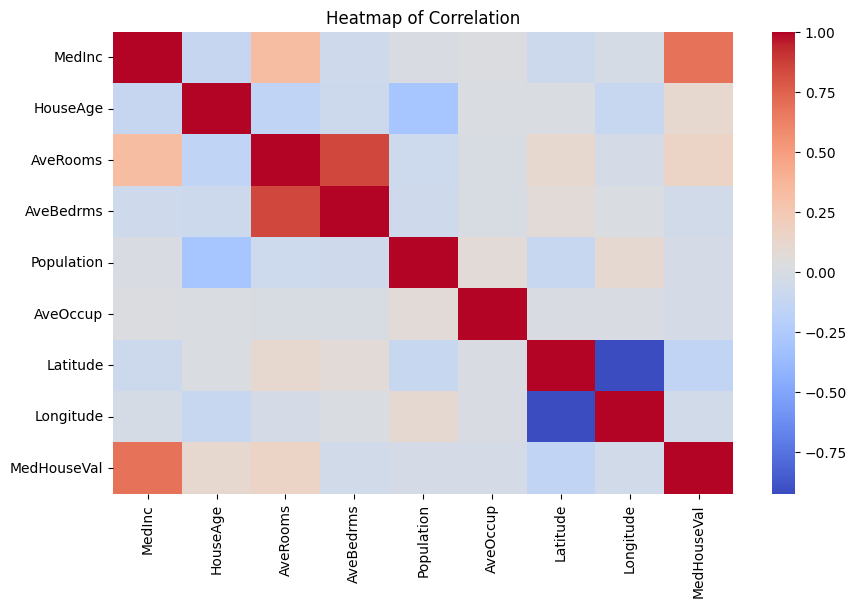

In [11]:
plt.figure(figsize =(10,6))
sns.heatmap(df.corr(),cmap="coolwarm", annot=False)
plt.title("Heatmap of Correlation")
plt.show()


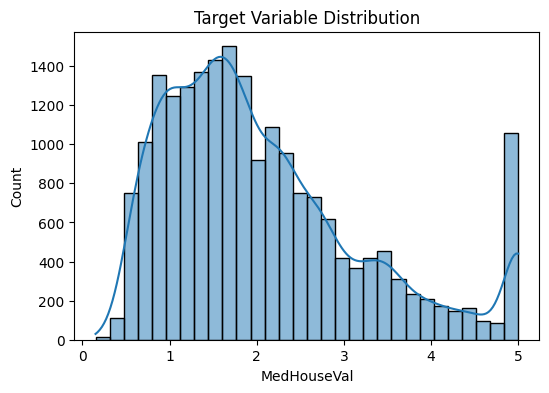

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title("Target Variable Distribution")
plt.show()

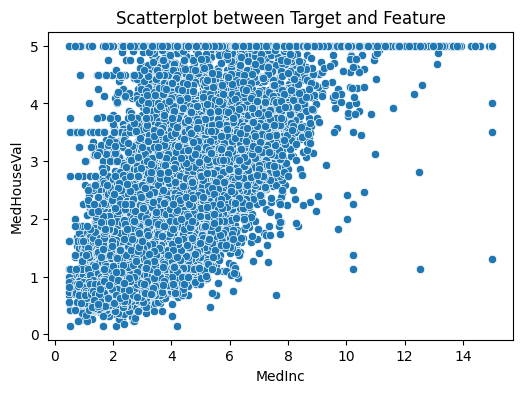

In [15]:
plt.figure(figsize =(6,4))
sns.scatterplot(x = df['MedInc'],y = df['MedHouseVal'])
plt.title('Scatterplot between Target and Feature')
plt.show()

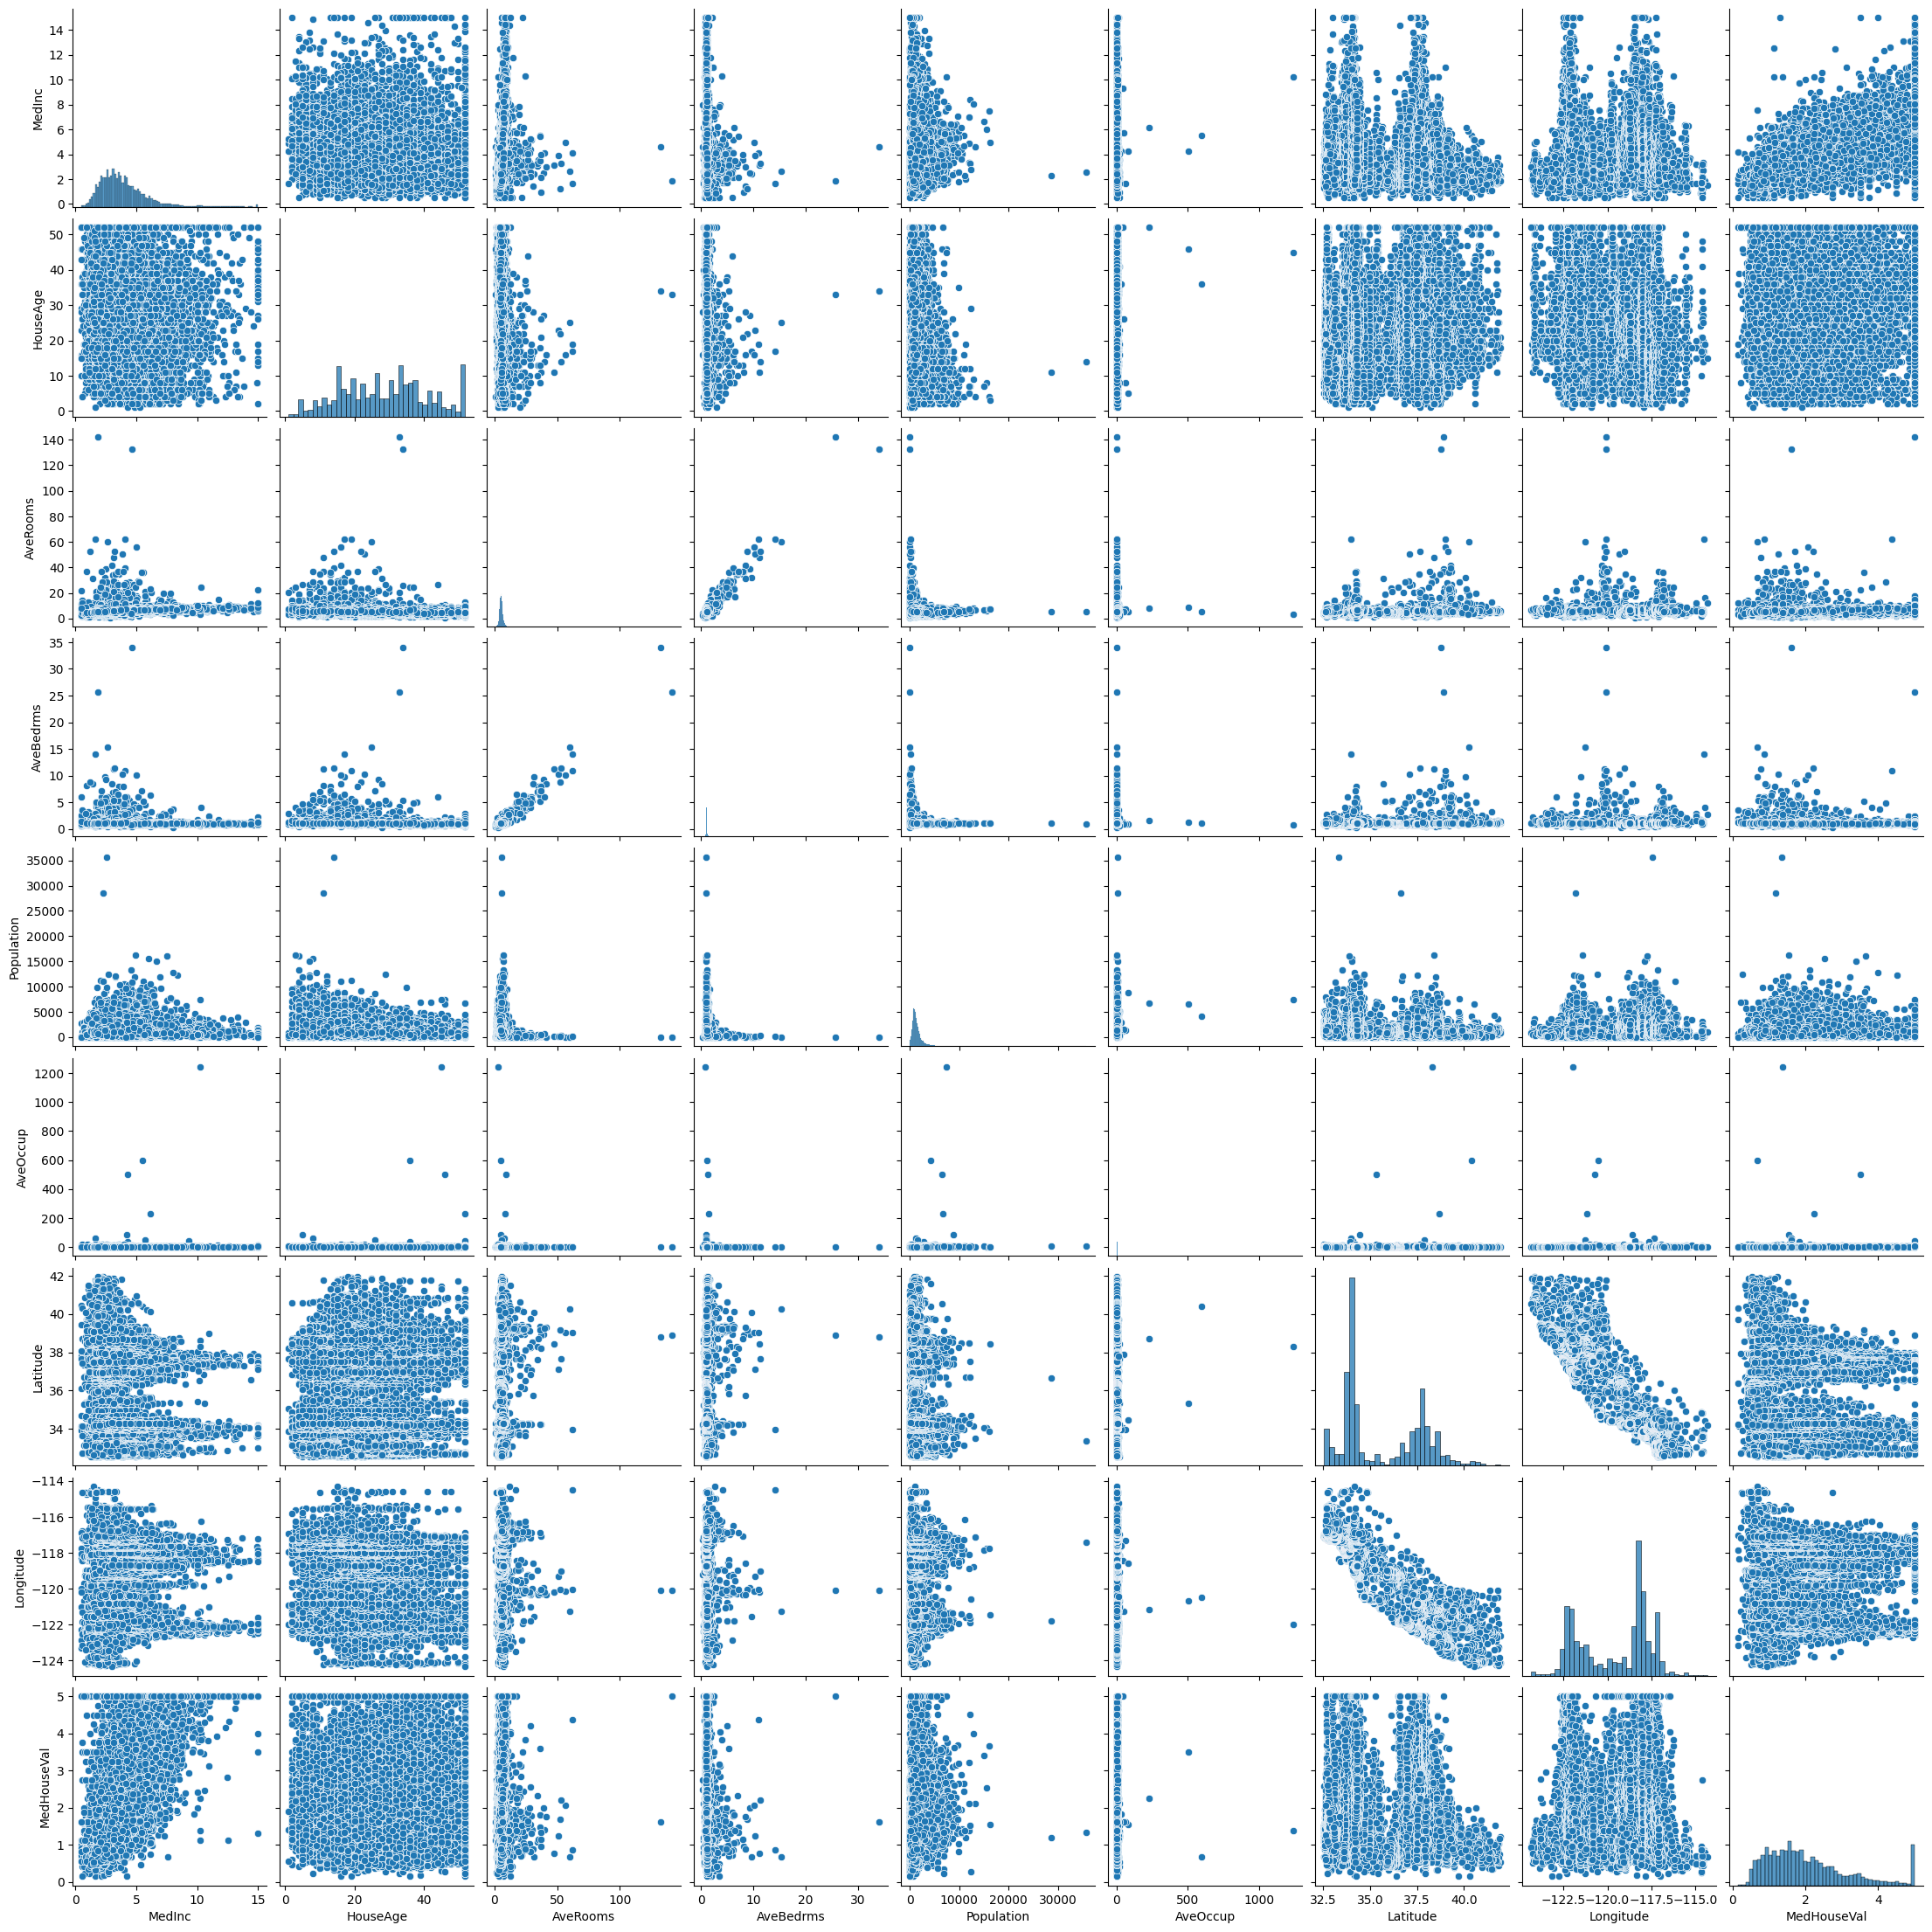

In [17]:
sns.pairplot(df)

In [18]:
X = df.drop(columns= 'MedHouseVal')
y = df['MedHouseVal']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =40)

In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
model =LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred_lr = model.predict(X_test_scaled)

In [35]:
#y_pred = model.predict(X_test)
def evaluate(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

lr_metrics = evaluate(y_test, y_pred_lr)
lr_metrics

{'R2': 0.6075794091011186,
 'MAE': 0.5389572480554761,
 'RMSE': 0.7360378574346162}

In [37]:
cv_r2 = cross_val_score(
    model, X_train_scaled, y_train,
    scoring="r2", cv=5
)

print("CV R2 Mean:", cv_r2.mean())
print("CV R2 Std:", cv_r2.std())

CV R2 Mean: 0.6013958383467154
CV R2 Std: 0.018713641359702948


In [26]:
r2 = r2_score(y_test,y_pred)
mae =mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'absolute r square: {r2}')
print(f"R² Score: {r2:.3f}") # round till 3 decimal
print(f'mean absolute error: {mae: .3f}')
print(f'root mean square error :{rmse}')

absolute r square: 0.6075794091011186
R² Score: 0.608
mean absolute error:  0.539
root mean square error :0.7360378574346164


In [27]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

      Feature  Coefficient
3   AveBedrms     0.595523
0      MedInc     0.430499
1    HouseAge     0.009246
4  Population    -0.000004
5    AveOccup    -0.004595
2    AveRooms    -0.099016
6    Latitude    -0.421093
7   Longitude    -0.433929


In [38]:
#ridge model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
ridge_metrics = evaluate(y_test, y_pred_ridge)
ridge_metrics

{'R2': 0.6075684899176718,
 'MAE': 0.5389566930478005,
 'RMSE': 0.736048097565574}

In [39]:
#lasso model:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
lasso_metrics = evaluate(y_test, y_pred_lasso)
lasso_metrics

{'R2': 0.6001313496999348, 'MAE': 0.54368948953344, 'RMSE': 0.742989946237503}

In [40]:
comparison = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "R2": [lr_metrics["R2"], ridge_metrics["R2"], lasso_metrics["R2"]],
    "MAE": [lr_metrics["MAE"], ridge_metrics["MAE"], lasso_metrics["MAE"]],
    "RMSE": [lr_metrics["RMSE"], ridge_metrics["RMSE"], lasso_metrics["RMSE"]]
})

comparison

,Model,R2,MAE,RMSE
0,Linear,0.607579,0.538957,0.736038
1,Ridge,0.607568,0.538957,0.736048
2,Lasso,0.600131,0.543689,0.742990


In [41]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

feature_importance

,Feature,Coefficient
6,Latitude,-0.899340
7,Longitude,-0.869070
0,MedInc,0.816015
3,AveBedrms,0.302120
2,AveRooms,-0.257386
1,HouseAge,0.115868
5,AveOccup,-0.029609
4,Population,-0.004907


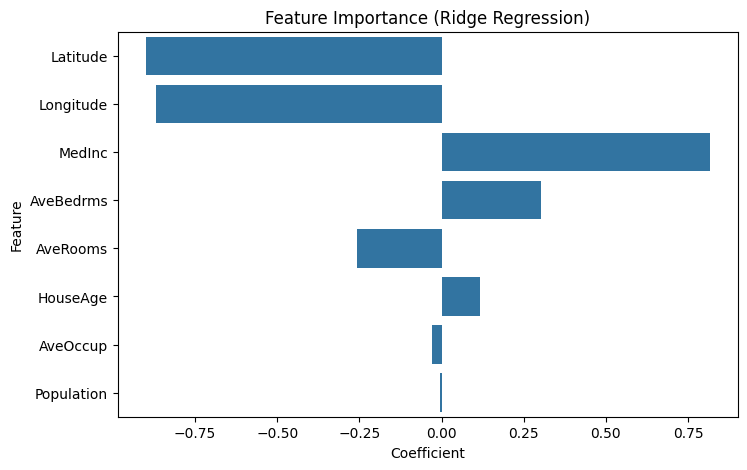

In [42]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=feature_importance,
    x="Coefficient",
    y="Feature"
)
plt.title("Feature Importance (Ridge Regression)")
plt.show()

In [43]:
lasso_features = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso.coef_
})

lasso_features[lasso_features["Coefficient"] != 0]

,Feature,Coefficient
0,MedInc,0.762758
1,HouseAge,0.121877
2,AveRooms,-0.110502
3,AveBedrms,0.154366
5,AveOccup,-0.021808
6,Latitude,-0.796824
7,Longitude,-0.759676


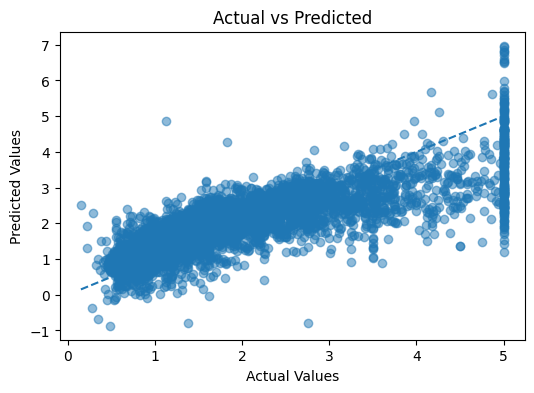

In [31]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.show()

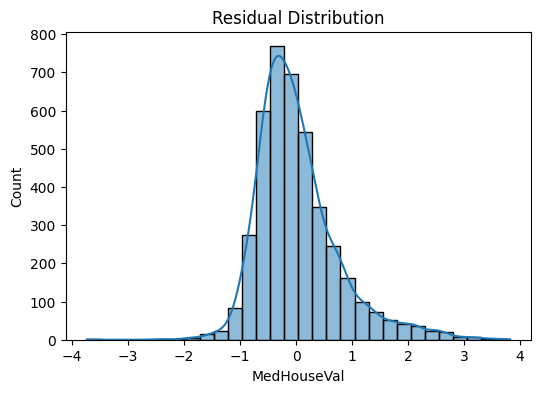

In [30]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
#pip install statsmodels
import statsmodels.api as sm 

In [33]:
x= [-1,0,1,2,3,4]
y =[-3,-1,1,3,5,7]

In [29]:
x= [-1,0,1,2,3,4]
z = list(map(lambda nrow: nrow**2,x))
print(z)
#column_names = ["First Name", "Last Name"] 
z2 =pd.DataFrame({'original':x,'squared':z})
print(z2)

[1, 0, 1, 4, 9, 16]
   original  squared
0        -1        1
1         0        0
2         1        1
3         2        4
4         3        9
5         4       16


In [38]:
x = sm.add_constant(x)

In [4]:
x

array([[ 1., -1.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.]])

In [39]:
result = sm.OLS(y, x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.840e+33
Date:                Mon, 09 Feb 2026   Prob (F-statistic):           7.44e-67
Time:                        15:15:59   Log-Likelihood:                 211.04
No. Observations:                   6   AIC:                            -418.1
Df Residuals:                       4   BIC:                            -418.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0000   8.53e-17  -1.17e+16      0.0

/Users/shubhamsirothia/anaconda/envs/py311/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


/var/folders/h4/h9_1l3310kq59956t3c60zw80000gn/T/ipykernel_10852/1174953279.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = result.params[0] + result.params[1] * x_range


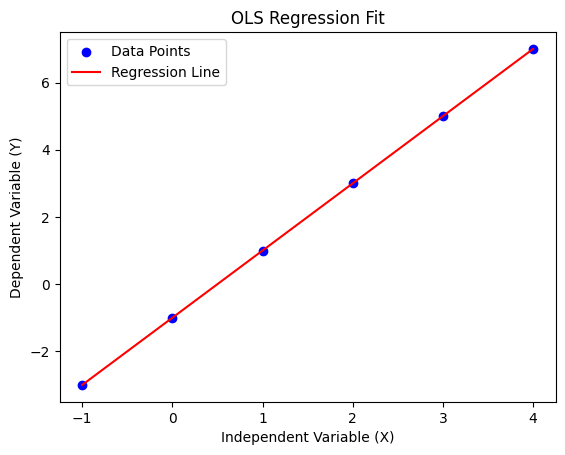

In [37]:
plt.scatter(x, y, color='blue', label='Data Points')

x_range = np.linspace(min(x), max(x), 100)
y_pred = result.params[0] + result.params[1] * x_range 

plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.title('OLS Regression Fit')
plt.legend()
plt.show()

In [18]:
result.params

array([-1.,  2.])